# House Star Wars
Arjoselle Ortiz

Carlo Pailagao

Carlo Sandiko

JM Ang

Josh Javier

## Exploratory Analysis on
# EDSA Traffic 
## based on Incident Tweets by MMDA

### Data Preparation

In [ ]:
import numpy as np
import pandas as pd

#These two modules will be used to create some basic visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#This is a jupyter magic command that embeds the image generated by matplotlib right after the code cell
%matplotlib inline

In [ ]:
df = pd.read_csv('data/data_mmda_traffic_spatial.csv')
df = df.drop(columns=['Source'])
df = df.drop_duplicates()
df

,Date,Time,City,Location,Latitude,Longitude,Direction,Type,Lanes_Blocked,Involved,Tweet
0,8/20/2018,7:55 AM,Pasig City,ORTIGAS EMERALD,14.586343,121.061481,EB,VEHICULAR ACCIDENT,1.0,TAXI AND MC,MMDA ALERT: Vehicular accident at Ortigas Emer...
1,8/20/2018,8:42 AM,Mandaluyong,EDSA GUADIX,14.589432,121.057243,NB,STALLED L300 DUE TO MECHANICAL PROBLEM,1.0,L300,MMDA ALERT: Stalled L300 due to mechanical pro...
2,8/20/2018,9:13 AM,Makati City,EDSA ROCKWELL,14.559818,121.040737,SB,VEHICULAR ACCIDENT,1.0,SUV AND L300,MMDA ALERT: Vehicular accident at EDSA Rockwel...
4,8/20/2018,10:27 AM,San Juan,ORTIGAS CLUB FILIPINO,14.601846,121.046754,EB,VEHICULAR ACCIDENT,1.0,2 CARS,MMDA ALERT: Vehicular accident at Ortigas Club...
5,8/20/2018,11:18 AM,Makati City,C5 KALAYAAN,14.556079,121.062936,SB,VEHICULAR ON FIRE,1.0,BUS,MMDA ALERT: Vehicular on fire at C5 Kalayaan S...
...,...,...,...,...,...,...,...,...,...,...,...
13962,2019-12-20,8:03 AM,Quezon City,QUEZON AVE AGHAM TUNNEL,14.646323,121.040861,WB,VEHICULAR ACCIDENT,1.0,"SUV, MC, VAN AND TAXI",MMDA ALERT: Vehicular accident at Quezon Ave A...
13963,2019-12-20,8:50 AM,Pasay City,ROXAS BUENDIA,14.552294,120.989491,NB,VEHICULAR ACCIDENT,1.0,ARMORED VEHICLE AND MC,MMDA ALERT: Vehicular accident at Roxas Buendi...
13964,2019-12-20,9:30 AM,Manila,P BURGOS MA OROSA,14.585217,120.979377,EB,VEHICULAR ACCIDENT,1.0,PUJ AND MC,MMDA ALERT: Vehicular accident at P. Burgos Ma...
13965,2019-12-20,10:11 AM,Makati City,C5 KALAYAAN ELEVATED UTS,14.556079,121.062936,SB,VEHICULAR ACCIDENT,1.0,FORD RANGER AND MC,MMDA ALERT: Vehicular accident at C5 elevated ...


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [ ]:
#remove incomplete months
df = df['2018-09-01':'2019-11-30']

### Feature Selection

#### Heatmap.
Create heatmap to get a general idea about traffic incidence.

In [ ]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [ ]:
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

In [ ]:
map_ = folium.Map(location=[14.552333, 121.018916], height=700, width=1000,
                    zoom_start = 11.5) 
heat_data = [[row['Latitude'],row['Longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(map_)
map_.save("MM_Traffic.html")
map_

Traffic incidence seems to be concentrated along EDSA.

Check the numbers to confirm.

In [ ]:
df_loc = df.groupby('Location')['Location'].count().sort_values(ascending=False)[:20]
df_loc

Location
EDSA SHAW TUNNEL         249
EDSA GUADALUPE           233
EDSA BUENDIA             191
EDSA MEGAMALL            189
EDSA MAIN AVE            164
C5 LANUZA                157
EDSA ORTIGAS FLYOVER     150
EDSA RELIANCE            143
EDSA SANTOLAN FLYOVER    137
EDSA PIONEER             137
EDSA SHAW                134
EDSA SM NORTH            133
EDSA ORTIGAS             132
EDSA BONI                132
EDSA AYALA TUNNEL        126
C5 ORTIGAS FLYOVER       123
C5 KALAYAAN              122
EDSA SANTOLAN            122
C5 ORTIGAS               115
C5 GREENMEADOWS          108
Name: Location, dtype: int64

In [ ]:
df[df['Location'].astype(str).str.contains('EDSA')]['Location'].count()/df['Location'].count()

0.504257907542579

50% of overall traffic incidence occured along EDSA.

We'll then investigate the cause of traffic incidence in this area.

Features that may be helpful:
1. Date and time of occurence.
2. Type of incidence and those involved.

###  Visualization

#### Is the number of traffic incidence affected by season?

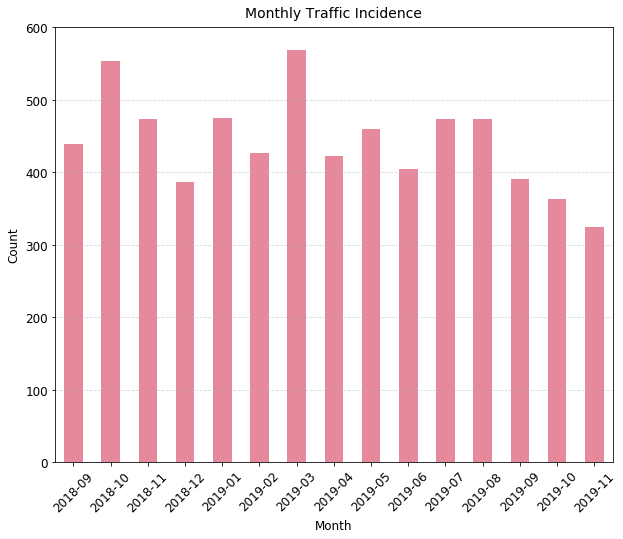

In [ ]:
df_mon = df[df['Location'].astype(str).str.contains('EDSA')].resample('M').count()
ax = df_mon['Location'].plot(kind='bar', figsize=(10,8), color='#E7899D', rot=45, fontsize=12)
xtl = [item.get_text()[:7] for item in ax.get_xticklabels()]
ax.set_xticklabels(xtl)
plt.xlabel('Month', size=12, labelpad=5)
plt.ylabel('Count', size=12, labelpad=5)
ax.grid('on', which='major', axis='y', linestyle='--', alpha=0.5)
plt.ylim(0,600)
plt.title('Monthly Traffic Incidence', pad=10, fontsize=14)

plt.savefig('monthly_traffic.png', title='Monthly Traffic Incidence')

No trend observed to indicate seasonality.

   #### Is there a particular time that these incidence occur?

In [ ]:
df2 = pd.read_csv('data/data_mmda_traffic_spatial.csv')

In [ ]:
df_hour = df2[df2['Location'].astype(str).str.contains('EDSA')]
df_hour = df_hour[df_hour['Time'].notnull()]
df_hour['Time'] = df_hour['Time'].astype(str)
df_hour['Time'] = df_hour['Time'].apply(lambda x: x.replace(r'(AM|PM)', r' \1') if ' ' not in x else x)
df_hour = df_hour[df_hour['Time']!='22:55 PM']
df_hour['Time'] = pd.to_datetime(df_hour['Time'])
df_hour = df_hour.set_index(df_hour['Time'])
df_h = df_hour[df_hour['Date'].str.contains('2019-11')]
df_hour = df_hour['Location'].resample('H').count()

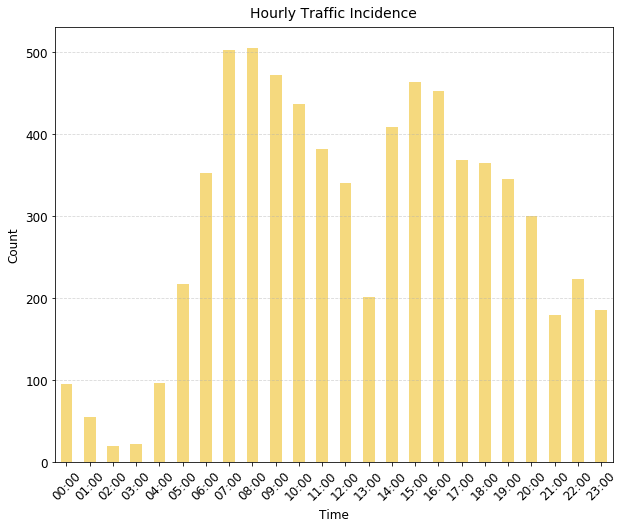

In [ ]:
ax = df_hour.plot(kind='bar', color='#F5D97E', figsize=(10,8), fontsize=12, rot=45)
xtl=[item.get_text()[11:16] for item in ax.get_xticklabels()]
ax.set_xticklabels(xtl,fontsize=12)
ax.grid('on', which='major', axis='y', linestyle='--', alpha=0.5)
plt.xlabel('Time', size=12, labelpad=5)
plt.ylabel('Count', size=12, labelpad=5)
plt.title('Hourly Traffic Incidence', pad=10, fontsize=14)

plt.savefig('Hourly_traffic.png', title='Hourly Traffic Incidence')

In [ ]:
df_h.head()

,Date,Time,City,Location,Latitude,Longitude,Direction,Type,Lanes_Blocked,Involved,Tweet,Source
Time,,,,,,,,,,,,
2020-05-06 11:25:00,2019-11-01,2020-05-06 11:25:00,Mandaluyong,EDSA SHAW TUNNEL,14.581153,121.053565,SB,STALLED L300 DUE TO MECHANICAL PROBLEM,1.0,L300,MMDA ALERT: Stalled L300 due to mechanical pro...,https://twitter.com/mmda/status/11901152759594...
2020-05-06 13:13:00,2019-11-01,2020-05-06 13:13:00,Mandaluyong,EDSA MEGAMALL,14.584488,121.055562,NB,MULTIPLE COLLISION,1.0,2 MCS AND CAR,MMDA ALERT: Multiple collision at EDSA Megamal...,https://twitter.com/mmda/status/11901370299101...
2020-05-06 23:15:00,2019-11-01,2020-05-06 23:15:00,Makati City,EDSA GUADALUPE,14.566348,121.045356,SB,STALLED BUS DUE TO MECHANICAL PROBLEM,1.0,BUS,MMDA ALERT: Stalled bus due to mechanical prob...,https://twitter.com/mmda/status/11902924411374...
2020-05-06 09:09:00,2019-11-02,2020-05-06 09:09:00,Quezon City,EDSA ARAY,14.619581,121.051019,SB,STALLED BUS DUE TO MECHANICAL PROBLEM,1.0,BUS,MMDA ALERT: Stalled bus due to mechanical prob...,https://twitter.com/mmda/status/11904382080660...
2020-05-06 10:14:00,2019-11-02,2020-05-06 10:14:00,Quezon City,EDSA SANTOLAN FLYOVER,14.609768,121.055583,SB,VEHICULAR ACCIDENT,1.0,VAN AND AUV,MMDA ALERT: Vehicular accident at EDSA Santola...,https://twitter.com/mmda/status/11904529015141...


In [ ]:
# Create weight column, using date
df_h['Weight'] = [str(x)[11:13] for x in df_h.index.values]

hours = []
for i in df_h.index.values.astype(str):
    if i.astype(str)[11:13] not in hours:
        hours.append(i.astype(str)[11:13])
    else:
        continue

# List comprehension to make out list of lists
heat_data = [[[row['Latitude'],row['Longitude']] for index, row in df_h[df_h['Weight'] == i].iterrows()] for i in hours]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data,radius=5, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, min_opacity=0.2, max_opacity=0.8, index=hours)
hm.add_to(map_)
# Display the map
map_

Overall, traffic incidents peak at 7-8 AM, when most people commute to work.

This drops by midday, but picks up again by 3-4 PM.


#### In what direction is it most likely to occur?

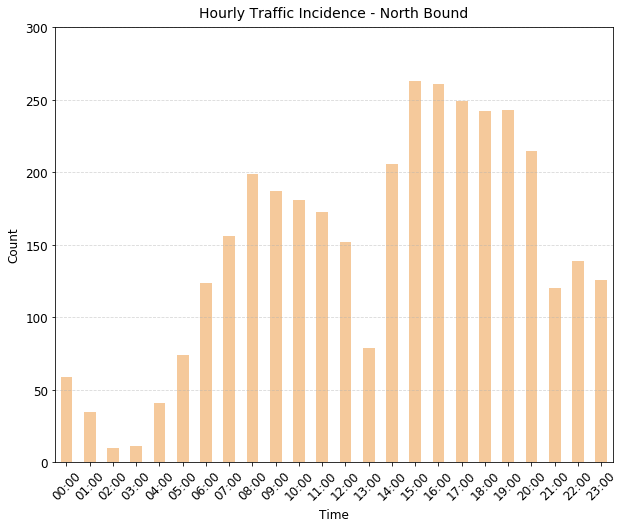

In [ ]:
df_hour = df2[(df2['Location'].astype(str).str.contains('EDSA'))&(df2['Direction']=='NB')]
df_hour = df_hour[df_hour['Time'].notnull()]
df_hour['Time'] = df_hour['Time'].astype(str)
df_hour['Time'] = df_hour['Time'].apply(lambda x: x.replace(r'(AM|PM)', r' \1') if ' ' not in x else x)
df_hour = df_hour[df_hour['Time']!='22:55 PM']
df_hour['Time'] = pd.to_datetime(df_hour['Time'])
df_hour = df_hour.set_index(df_hour['Time'])
df_hour = df_hour['Location'].resample('H').count()

ax = df_hour.plot(kind='bar', color='#f5c99b', figsize=(10,8), fontsize=12, rot=45)
xtl=[item.get_text()[11:16] for item in ax.get_xticklabels()]
ax.set_xticklabels(xtl,fontsize=12)
ax.grid('on', which='major', axis='y', linestyle='--', alpha=0.5)
plt.ylim(0,300)
plt.xlabel('Time', size=12, labelpad=5)
plt.ylabel('Count', size=12, labelpad=5)
plt.title('Hourly Traffic Incidence - North Bound', pad=10, fontsize=14)

plt.savefig('Hourly_traffic_north.png', title='Hourly Traffic Incidence')

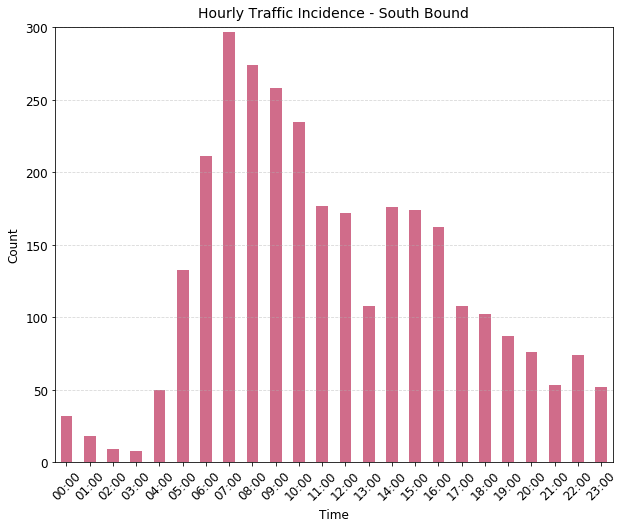

In [ ]:
df_hour = df2[(df2['Location'].astype(str).str.contains('EDSA'))&(df2['Direction']=='SB')]
df_hour = df_hour[df_hour['Time'].notnull()]
df_hour['Time'] = df_hour['Time'].astype(str)
df_hour['Time'] = df_hour['Time'].apply(lambda x: x.replace(r'(AM|PM)', r' \1') if ' ' not in x else x)
df_hour = df_hour[df_hour['Time']!='22:55 PM']
df_hour['Time'] = pd.to_datetime(df_hour['Time'])
df_hour = df_hour.set_index(df_hour['Time'])
df_hour = df_hour['Location'].resample('H').count()

ax = df_hour.plot(kind='bar', color='#D06C8A', figsize=(10,8), fontsize=12, rot=45)
xtl=[item.get_text()[11:16] for item in ax.get_xticklabels()]
ax.set_xticklabels(xtl,fontsize=12)
ax.grid('on', which='major', axis='y', linestyle='--', alpha=0.5)
plt.ylim(0,300)
plt.xlabel('Time', size=12, labelpad=5)
plt.ylabel('Count', size=12, labelpad=5)
plt.title('Hourly Traffic Incidence - South Bound', pad=10, fontsize=14)

plt.savefig('Hourly_traffic_south.png', title='Hourly Traffic Incidence')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


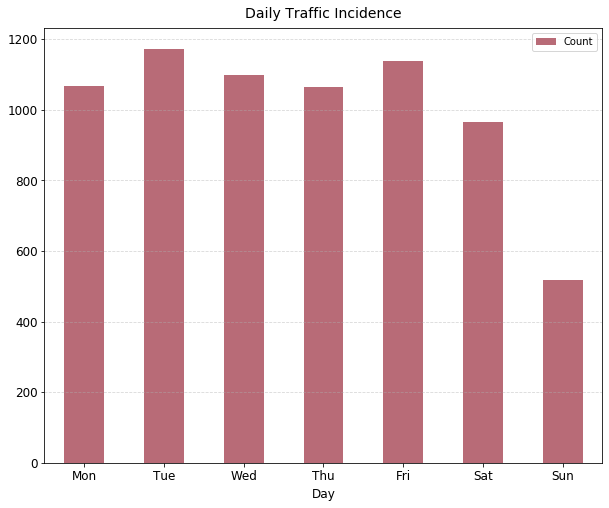

In [ ]:
df_day = df2[(df2['Location'].astype(str).str.contains('EDSA'))]
df_day['Day'] = pd.to_datetime(df2['Date']).dt.strftime('%a')
df_day = df_day['Day'].value_counts().reset_index().rename(columns={'Day': 'Count', 'index': 'Day'})

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_day['key'] = df_day['Day'].map({day: i for i, day in enumerate(weekdays)})
df_day = df_day.sort_values('key').drop(columns=['key']).set_index('Day')
#df_day.plot(kind='bar', rot=0);


ax = df_day.plot(kind='bar', color='#b86b77', figsize=(10,8), fontsize=12, rot=0)
ax.grid('on', which='major', axis='y', linestyle='--', alpha=0.5)
plt.xlabel('Day', size=12, labelpad=5)
plt.title('Daily Traffic Incidence', pad=10, fontsize=14)
ax.plot(legend=False)

plt.savefig('Daily.png', title='Daily Traffic Incidence')

Monday to Saturday show high number of traffic incidents.

It drops on Sunday.


#### What's the cause of traffic incidence?

In [ ]:
df_type = df2[df2['Location'].astype(str).str.contains('EDSA')]
df_type = df_type[df_type['Type'].notnull()] #drop na
df_type = df_type[~df_type['Type'].str.contains('MMDA ALERT')] #drop sentences
df_type['Type'] = df_type['Type'].astype(str).apply(lambda x: 'STALLED VEHICLE' if 'STALLED' in x else x.strip())
df_type['Type'] = df_type['Type'].astype(str).apply(lambda x: 'VEHICULAR ACCIDENT' if 'CULAR ACCIDENT' in x else x)
df_type['Type'] = df_type['Type'].astype(str).apply(lambda x: 'DPWH' if 'DPWH' in x else x)
df_type = df_type[df_type['Location'].astype(str).str.contains('EDSA')].groupby(['Type'])['Type'].count().sort_values(ascending=False)
df_type = pd.DataFrame(df_type)
df_type.columns=['Count']
df_type = df_type.reset_index()
df_type_top = df_type[:5]
df_type['Type'] = df_type['Type'].astype(str).apply(lambda x: 'OTHERS' if x not in df_type_top['Type'].values else x)
df_type = df_type.groupby(['Type'])['Count'].sum().sort_values(ascending=False).reset_index()
df_type

,Type,Count
0,VEHICULAR ACCIDENT,4709
1,STALLED VEHICLE,1747
2,MULTIPLE COLLISION,235
3,DPWH,113
4,OTHERS,109
5,SELF ACCIDENT,58


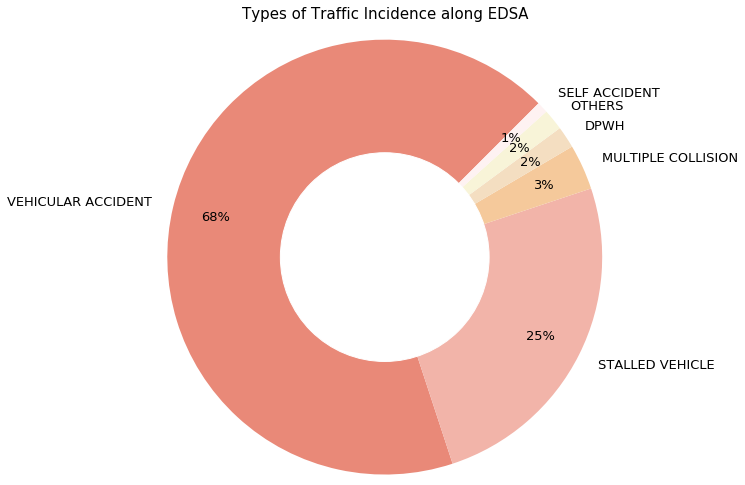

In [ ]:
fig, ax = plt.subplots()

ax.pie(df_type['Count'], labels=df_type['Type'], autopct='%1.0f%%', radius=2.5, rotatelabels=0, labeldistance=1.1,textprops={'fontsize': 13},
        pctdistance=0.8, startangle=45, colors=['#e98978','#f2b4a9', '#f5c99b', '#f4dec1', '#f8f4d8', '#FEF2F2'])
#ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

my_circle=plt.Circle( (0,0), 1.2, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

#plt.savefig('types.png', title='Types of Traffic Incidence along EDSA')
plt.title('Types of Traffic Incidence along EDSA', pad=130, fontdict= {'fontsize': 15})
plt.show()

### Conclusion

Generally, majority of the people travel south in the morning and travel north in the late afternoon. We recommend having dynamic number of lanes. 

Stalled Vehicles are mostly due to Mechanical Problems. This is something preventable by having maintenance. We recommend imposing stricter regulations for vehicles to have periodic maintenance.